In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# path = '/Users/aqian/Downloads/'
# #path = 'M:/Edmund'
# os.chdir(path)
df = pd.read_csv("NRD 2013 (machine learning).csv")
df.head()

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1,89,1,0.0,1.071937,1.0,6,2,853,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
2,2,89,0,0.0,1.071937,5.0,9,3,853,30,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
# List all of the column names
print(df.columns.values)

['index' 'age' 'aweekend' 'died' 'discwt' 'dispuniform' 'dmonth' 'dqtr'
 'drg' 'drgver' 'drg_nopoa' 'dx1' 'dx2' 'dx3' 'dx4' 'dx5' 'dx6' 'dx7'
 'dx8' 'dx9' 'dx10' 'dx11' 'dx12' 'dx13' 'dx14' 'dx15' 'dx16' 'dx17'
 'dx18' 'dx19' 'dx20' 'dx21' 'dx22' 'dx23' 'dx24' 'dx25' 'dxccs1' 'dxccs2'
 'dxccs3' 'dxccs4' 'dxccs5' 'dxccs6' 'dxccs7' 'dxccs8' 'dxccs9' 'dxccs10'
 'dxccs11' 'dxccs12' 'dxccs13' 'dxccs14' 'dxccs15' 'dxccs16' 'dxccs17'
 'dxccs18' 'dxccs19' 'dxccs20' 'dxccs21' 'dxccs22' 'dxccs23' 'dxccs24'
 'dxccs25' 'elective' 'female' 'hcup_ed' 'hosp_nrd' 'key_nrd' 'los' 'mdc'
 'mdc_nopoa' 'nchronic' 'ndx' 'necode' 'npr' 'nrd_daystoevent'
 'nrd_stratum' 'nrd_visitlink' 'orproc' 'pay1' 'pl_nchs' 'pr1' 'pr2' 'pr3'
 'pr4' 'pr5' 'pr6' 'pr7' 'pr8' 'pr9' 'pr10' 'pr11' 'pr12' 'pr13' 'pr14'
 'pr15' 'prccs1' 'prccs2' 'prccs3' 'prccs4' 'prccs5' 'prccs6' 'prccs7'
 'prccs8' 'prccs9' 'prccs10' 'prccs11' 'prccs12' 'prccs13' 'prccs14'
 'prccs15' 'rehabtransfer' 'resident' 'samedayevent' 'totchg' 'year'
 'zip

In [4]:
df['ibd_specific_adm']

0        0
1        0
2        0
3        1
4        1
        ..
94493    1
94494    0
94495    0
94496    0
94497    1
Name: ibd_specific_adm, Length: 94498, dtype: int64

In [5]:
# Check the top 5 rows
df.head(5) 

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1,89,1,0.0,1.071937,1.0,6,2,853,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
2,2,89,0,0.0,1.071937,5.0,9,3,853,30,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
# Make a copy of the dataframe
df_copy = df.copy()
df_copy.head()

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1,89,1,0.0,1.071937,1.0,6,2,853,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
2,2,89,0,0.0,1.071937,5.0,9,3,853,30,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
# Check the back end of the data
df_copy.tail()

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
94493,94493,44,0,0.0,1.669010,6.0,6,2,331,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
94494,94494,44,0,0.0,1.669010,1.0,8,3,346,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
94495,94495,44,0,0.0,1.669010,1.0,8,3,393,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
94496,94496,52,0,0.0,1.863343,1.0,2,1,472,30,...,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
94497,94497,72,1,0.0,1.771707,1.0,2,1,385,30,...,0,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
# Check the data 
# Looks like the ibd_readm variables contains "NA" values

df_copy[['nrd_visitlink','ibd_index_hosp', 'dx1', 'new_mi_adm', 'ibd_readm']].head()

,nrd_visitlink,ibd_index_hosp,dx1,new_mi_adm,ibd_readm
0,00017u,1,00845,0,0
1,00017u,0,0389,0,1
2,00017u,0,03842,0,1
3,0004o5,1,5559,0,0
4,000dbz,1,5559,0,0


In [9]:
# # Recoding the ibd_readm outcome variable
# readm_set = set()
# for row in df_copy.itertuples():
#     if row.ibd_readm == 1:
#         readm_set.add(row.nrd_visitlink)
        
# readm_list = list(readm_set)

# df_copy.loc[df_copy.nrd_visitlink.isin(readm_list), 'ibd_readm'] = '1'
# df_copy[['nrd_visitlink','ibd_index_hosp', 'ibd_readm']].head(25)

# Recoding the ibd_readm outcome variable
readm_set = set()
for index, row in df_copy[['nrd_visitlink','ibd_readm']].iterrows():
    if row[1] == 1:
        readm_set.add(row[0])
        
readm_list = list(readm_set)

df_copy.loc[df_copy.nrd_visitlink.isin(readm_list), 'ibd_readm'] = '1'
df_copy[['nrd_visitlink','ibd_index_hosp', 'ibd_readm']].head(15)

,nrd_visitlink,ibd_index_hosp,ibd_readm
0,00017u,1,1
1,00017u,0,1
2,00017u,0,1
3,0004o5,1,0
4,000dbz,1,1
5,000dbz,0,1
6,000dbz,0,1
7,000dbz,0,1
8,000dbz,0,1
9,000mgu,1,0


In [10]:
# df_copy['ibd_readm'] = df_copy['ibd_readm'].fillna(0)

df_copy[['nrd_visitlink', 'pay1', 'ibd_index_hosp', 'ibd_readm']].head(15)

,nrd_visitlink,pay1,ibd_index_hosp,ibd_readm
0,00017u,1.0,1,1
1,00017u,1.0,0,1
2,00017u,1.0,0,1
3,0004o5,3.0,1,0
4,000dbz,1.0,1,1
5,000dbz,1.0,0,1
6,000dbz,1.0,0,1
7,000dbz,1.0,0,1
8,000dbz,1.0,0,1
9,000mgu,3.0,1,0


In [11]:
# Number of index hospitalizations
index_hosp_counts = df_copy['ibd_index_hosp'].value_counts()
index_hosp_counts

1    47402
0    47096
Name: ibd_index_hosp, dtype: int64

In [12]:
# Number of readmissions within six months
readm_counts = df_copy['ibd_readm'].value_counts()
readm_counts

1    64373
0    30125
Name: ibd_readm, dtype: int64

In [13]:
# Filter the data so that only patients with an index hospitalizations are in a DataFrame
readm_data_df = df_copy.loc[df_copy["ibd_index_hosp"] == 1, :]

# Check to ensure the filter worked correctly
readm_data_df["ibd_index_hosp"].count()

47402

In [14]:
# Creating deciles by length of follow-up normalized by number of hospitalizations 
readm_data_df['ibd_deciles'] = pd.qcut(readm_data_df['ibdtotlos_alive_fu'], 10, labels=np.arange(10, 0, -1))

readm_data_df.head(15)

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4,ibd_deciles
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0,2
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,6
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1
9,9,51,0,0.0,2.958993,1.0,3,1,354,30,...,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,8
10,10,22,0,0.0,3.109660,1.0,1,1,330,30,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,6
11,11,33,1,0.0,1.061258,1.0,1,1,313,30,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3
19,19,84,0,0.0,2.155742,6.0,5,2,690,30,...,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,3
22,22,62,0,0.0,1.863343,5.0,2,1,853,30,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3
23,23,40,0,0.0,1.509554,1.0,3,1,389,30,...,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1
30,30,68,1,0.0,2.148695,6.0,5,2,854,30,...,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0,5


In [15]:
df_copy.isnull().sum()

index               0
age                 0
aweekend            0
died               24
discwt              0
                 ... 
_Ipayer_3         102
_Ipayer_4         102
_Izipinc_qr_2    1414
_Izipinc_qr_3    1414
_Izipinc_qr_4    1414
Length: 362, dtype: int64

In [16]:
# Generate a new variable to identify high-need, high-cost patients

def topDecile(series):
    if series == 10:
        return 1
    else:
        return 0
        
readm_data_df['hnhc_patients'] = readm_data_df['ibd_deciles'].apply(topDecile)

readm_data_df.tail(25)

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4,ibd_deciles,hnhc_patients
94449,94449,80,1,0.0,2.148695,1.0,2,1,386,30,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,5,0
94451,94451,38,0,0.0,1.700426,1.0,2,1,775,30,...,0,0,1.0,0.0,0.0,0.0,0.0,1.0,8,0
94452,94452,56,1,0.0,4.491267,5.0,3,1,439,30,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2,0
94455,94455,41,0,0.0,3.371811,1.0,1,1,392,30,...,0,0,1.0,0.0,0.0,0.0,1.0,0.0,10,1
94456,94456,35,0,0.0,1.551591,1.0,2,1,237,30,...,0,1,1.0,0.0,0.0,0.0,0.0,0.0,2,0
94457,94457,59,0,0.0,1.995433,1.0,1,1,683,30,...,0,1,1.0,0.0,0.0,0.0,1.0,0.0,1,0
94459,94459,20,0,0.0,2.243069,1.0,1,1,386,30,...,0,0,1.0,0.0,0.0,1.0,0.0,0.0,7,0
94461,94461,90,0,0.0,3.387816,1.0,4,2,309,30,...,0,1,0.0,0.0,0.0,1.0,0.0,0.0,8,0
94462,94462,19,0,0.0,2.275446,1.0,2,1,386,30,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
94465,94465,76,0,0.0,3.871441,5.0,5,2,470,30,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,7,0


In [17]:
# Create new features using isin function

# steroid use - V5865
readm_data_df['steroid_use'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['V5865']).any(axis=1).astype(int)

# abdominal pain - 78900
readm_data_df['abd_pain_adm'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['78900']).any(axis=1).astype(int)

# acute kidney injury - 5849
readm_data_df['aki_adm'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['5849']).any(axis=1).astype(int)

# gi bleed - 5789
readm_data_df['gi_bleed_adm'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['5789']).any(axis=1).astype(int)

readm_data_df.head(25)


,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4,ibd_deciles,hnhc_patients,steroid_use,abd_pain_adm,aki_adm,gi_bleed_adm
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,0.0,0.0,0.0,1.0,2,0,0,0,0,0
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,0.0,0.0,1.0,0.0,6,0,0,0,0,0
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,0.0,1.0,0.0,0.0,1,0,0,0,0,0
9,9,51,0,0.0,2.958993,1.0,3,1,354,30,...,0.0,0.0,0.0,1.0,8,0,0,0,0,0
10,10,22,0,0.0,3.109660,1.0,1,1,330,30,...,0.0,1.0,0.0,0.0,6,0,0,0,0,0
11,11,33,1,0.0,1.061258,1.0,1,1,313,30,...,0.0,0.0,0.0,0.0,3,0,0,0,0,0
19,19,84,0,0.0,2.155742,6.0,5,2,690,30,...,0.0,0.0,0.0,1.0,3,0,0,0,0,0
22,22,62,0,0.0,1.863343,5.0,2,1,853,30,...,0.0,0.0,0.0,0.0,3,0,0,0,1,0
23,23,40,0,0.0,1.509554,1.0,3,1,389,30,...,0.0,0.0,0.0,1.0,1,0,1,1,0,0
30,30,68,1,0.0,2.148695,6.0,5,2,854,30,...,0.0,0.0,0.0,1.0,5,0,0,0,1,0


### Export to csv for Tableau

In [ ]:
# # export to CSV

# readm_data_df.to_csv("IBD_readm_data_for_Tableau.csv")

In [ ]:
# # Number of rows with null values
# readm_data_df.isna().sum()

In [ ]:
# Drop all rows with null values
# readm_data_df_clean = readm_data_df.dropna(axis='columns')

# # Check the data
# print(readm_data_df["ibd_index_hosp"].count())
# print('-' * 15)

# # Check the data 
# print(readm_data_df.head(15))
# print('-' * 15)

# # Check the data 
# print(readm_data_df.tail(15))
# print('-' * 15)

In [ ]:
# print(readm_data_df.columns.values)
# # readm_data_df_clean

In [ ]:
# Check top_decile_ibd --> patients who are in the top ten percent of utilizers
# readm_data_df[['ibd_index_hosp', 'ibd_readm', 'top_ibd']]
# readm_data_df[['ibd_index_hosp', 'top_ibd', 'top_decile_ibd']].head(20)

In [ ]:
# List of all the variables in the dataset
['age',
 'female',
 'los',
 'aweekend',
 'elective',
 'orproc',
 'hosp_urban_rural_location',
 'payer',
 'zipinc_qrtl',
 'severe_IBD_hospitalization',
 'cm_aids',
 'cm_alcohol',
 'cm_anemdef',
 'cm_arth',
 'cm_bldloss',
 'cm_chf',
 'cm_chrnlung',
 'cm_depress',
 'cm_coag',
 'cm_dm',
 'cm_dmcx',
 'cm_drug',
 'cm_htn_c',
 'cm_hypothy',
 'cm_liver',
 'cm_lymph',
 'cm_lytes',
 'cm_mets',
 'cm_neuro',
 'cm_obese',
 'cm_para',
 'cm_perivasc',
 'cm_psych',
 'cm_pulmcirc',
 'cm_renlfail',
 'cm_tumor',
 'cm_ulcer',
 'cm_valve',
 'cm_wghtloss',
 'diabetes',
 'copd',
 'cm_smoking',
 'blood_transfusion',
 'ibd_procedures',
 'cc_index',
 'new_cc_index',
 'fractures',
 'thromboses',
 'unplanned_adm',
 'pq1_dm_short',
 'pq2_perf_appendix',
 'pq3_dm_long',
 'pq5_copd_asthma',
 'pq7_htn',
 'pq8_chf',
 'pq10_dehydrate',
 'pq11_bacterialpna',
 'pq12_uti',
 'pq13_angina',
 'pq14_diabeteswocomp',
 'pq15_asthma',
 'pq16_dm_amputate',
 'new_mi_adm',
 'new_chf_adm',
 'new_unstableangina_adm',
 'new_arrhythmia_adm',
 'new_cardiacarrest_adm',
 'new_meningitis_adm',
 'new_encephalitis_adm',
 'new_endocarditis_adm',
 'new_pneumonia_adm',
 'new_pyelonephritis_adm',
 'new_osteo_adm',
 'new_septicemia_adm',
 'new_cdiff_adm',
 'new_tb_adm',
 'new_atypicalmyco_adm',
 'new_fungal_adm',
 'new_listeriosis_adm',
 'new_leishmaniasis_adm',
 'new_pcp_adm',
 'chronic_pain',
 'ibd_surgery_adm',
 'frailty_risk_score',
 'frailty_risk_category',
 'frailty_risk_category_index',
 'h_contrl',
 'hosp_bedsize',
 'hosp_ur_teach',
 'hosp_urcat4',
 'prevent_readm',
 'cardiac_adm',
 'cvd_adm',
 'resp_adm',
 'infxn_adm',
 'gu_adm',
 'gi_adm',
 'endo_adm',
 'neuro_adm',
 'malignancies_adm',
 'fracture_adm',
 'thrombosis_adm',
 'ibd_specific_adm',
 'others_adm']

### Grabbing the features

#### Using readmission within 6 months as outcome

In [ ]:
# Grab the features

# Model 1
# data = readm_data_df[['age', 'zipinc_qrtl', 'female', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 
#                       'hosp_ur_teach', 'aweekend', 'elective', 'los', 'payer', 'cc_index', 'frailty_risk_score', 
#                       'prevent_readm', 'cardiac_adm', 'cvd_adm', 'resp_adm', 'infxn_adm', 'gu_adm', 'gi_adm', 'endo_adm', 
#                       'neuro_adm', 'malignancies_adm', 'fracture_adm', 'thrombosis_adm', 'ibd_specific_adm', 'others_adm',
#                       'severe_IBD_hospitalization', 'ibd_readm']]

# Model 2
# data = readm_data_df[['age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'cc_index', 'ibd_readm']]

# Model 3
# data = readm_data_df[['age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'ibd_specific_adm', 'infxn_adm', 'new_cdiff_adm',
#                       'hosp_bedsize', 'h_contrl', 'payer', 'cc_index', 'hosp_urcat4', 'ibd_readm']]

# Model 4
# data = readm_data_df[['age', 'frailty_risk_score', 'los', 'cc_index', 'steroid_use', 'aki_adm', 'abd_pain_adm', 'ibd_readm']]

# Model 5
# data = readm_data_df[['age', 'female', 'aweekend', 'frailty_risk_score', 'los', 'cc_index', 'steroid_use', 'aki_adm', 'abd_pain_adm', 'ibd_readm']]

# Model 6
# data = readm_data_df[['ibd_readm','age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 
#                       'cc_index', 'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend', 'ibd_specific_adm', 'diabetes', 'cm_depress', 'orproc', 
#                       'thromboses']]

# # Model 7
# data = readm_data_df[['age', 'female', 'aweekend', 'frailty_risk_score', 'los', 'cc_index', 'zipinc_qrtl', 'payer', 'ibd_specific_adm', 'infxn_adm', 
#                       'new_cdiff_adm', 'steroid_use', 'aki_adm', 'abd_pain_adm', 'ibd_readm']]

# Model 8
data = readm_data_df[['ibd_readm','age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 
                      'cc_index', 'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend', 'ibd_specific_adm', 'diabetes', 'cm_depress', 
                      'thromboses', 'new_cdiff_adm', 'steroid_use', 'aki_adm', 'abd_pain_adm']]

cleaned_data = data.dropna(axis='rows')
cleaned_data

#### Using high-need, high-cost patients within 6 months as outcome

In [18]:
# Looking at high-need, high-cost patients as a different outcome 
data = readm_data_df[['hnhc_patients','age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 
                      'cc_index', 'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend', 'ibd_specific_adm', 'diabetes', 'cm_depress', 
                      'thromboses', 'new_cdiff_adm', 'steroid_use', 'aki_adm', 'abd_pain_adm']]

cleaned_data = data.dropna(axis='rows')
cleaned_data

,hnhc_patients,age,frailty_risk_score,los,zipinc_qrtl,payer,hosp_bedsize,h_contrl,hosp_urcat4,hosp_ur_teach,...,cm_smoking,aweekend,ibd_specific_adm,diabetes,cm_depress,thromboses,new_cdiff_adm,steroid_use,aki_adm,abd_pain_adm
0,0,89,4.7,4,4.0,1.0,3,1,1,1,...,1,1,0,0,0,0,1,0,0,0
3,0,48,0.5,4,3.0,2.0,3,1,2,1,...,1,0,1,0,0,0,0,0,0,0
4,0,65,5.7,5,2.0,1.0,2,2,2,1,...,1,0,1,0,0,0,0,0,0,0
9,0,51,2.8,3,4.0,2.0,2,2,2,1,...,1,0,0,0,0,0,0,0,0,0
10,0,22,3.8,6,2.0,1.0,3,2,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94491,0,32,0.0,3,4.0,2.0,2,2,1,1,...,0,1,0,0,0,0,0,0,0,0
94492,0,54,0.0,4,4.0,2.0,3,2,1,1,...,0,0,0,0,0,0,0,0,0,0
94493,0,44,0.0,9,4.0,2.0,3,2,1,1,...,0,0,1,0,0,0,0,0,0,0
94496,1,52,1.5,2,1.0,1.0,3,2,2,0,...,0,0,0,1,1,0,0,0,0,0


In [19]:
# Grab outcome/label names after dropping na's/rows with na's
target = cleaned_data["hnhc_patients"]
target_names = ["none", "hnhc"]
target = target.astype('int64')
target

0        0
3        0
4        0
9        0
10       0
        ..
94491    0
94492    0
94493    0
94496    1
94497    0
Name: hnhc_patients, Length: 46632, dtype: int64

In [20]:
# Grab feature names after dropping na's/rows with na
cleaned_data_wo_outcome = cleaned_data.drop('hnhc_patients', axis=1)
featured_names = cleaned_data_wo_outcome.columns
featured_names

Index(['age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer',
       'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 'cc_index',
       'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend',
       'ibd_specific_adm', 'diabetes', 'cm_depress', 'thromboses',
       'new_cdiff_adm', 'steroid_use', 'aki_adm', 'abd_pain_adm'],
      dtype='object')

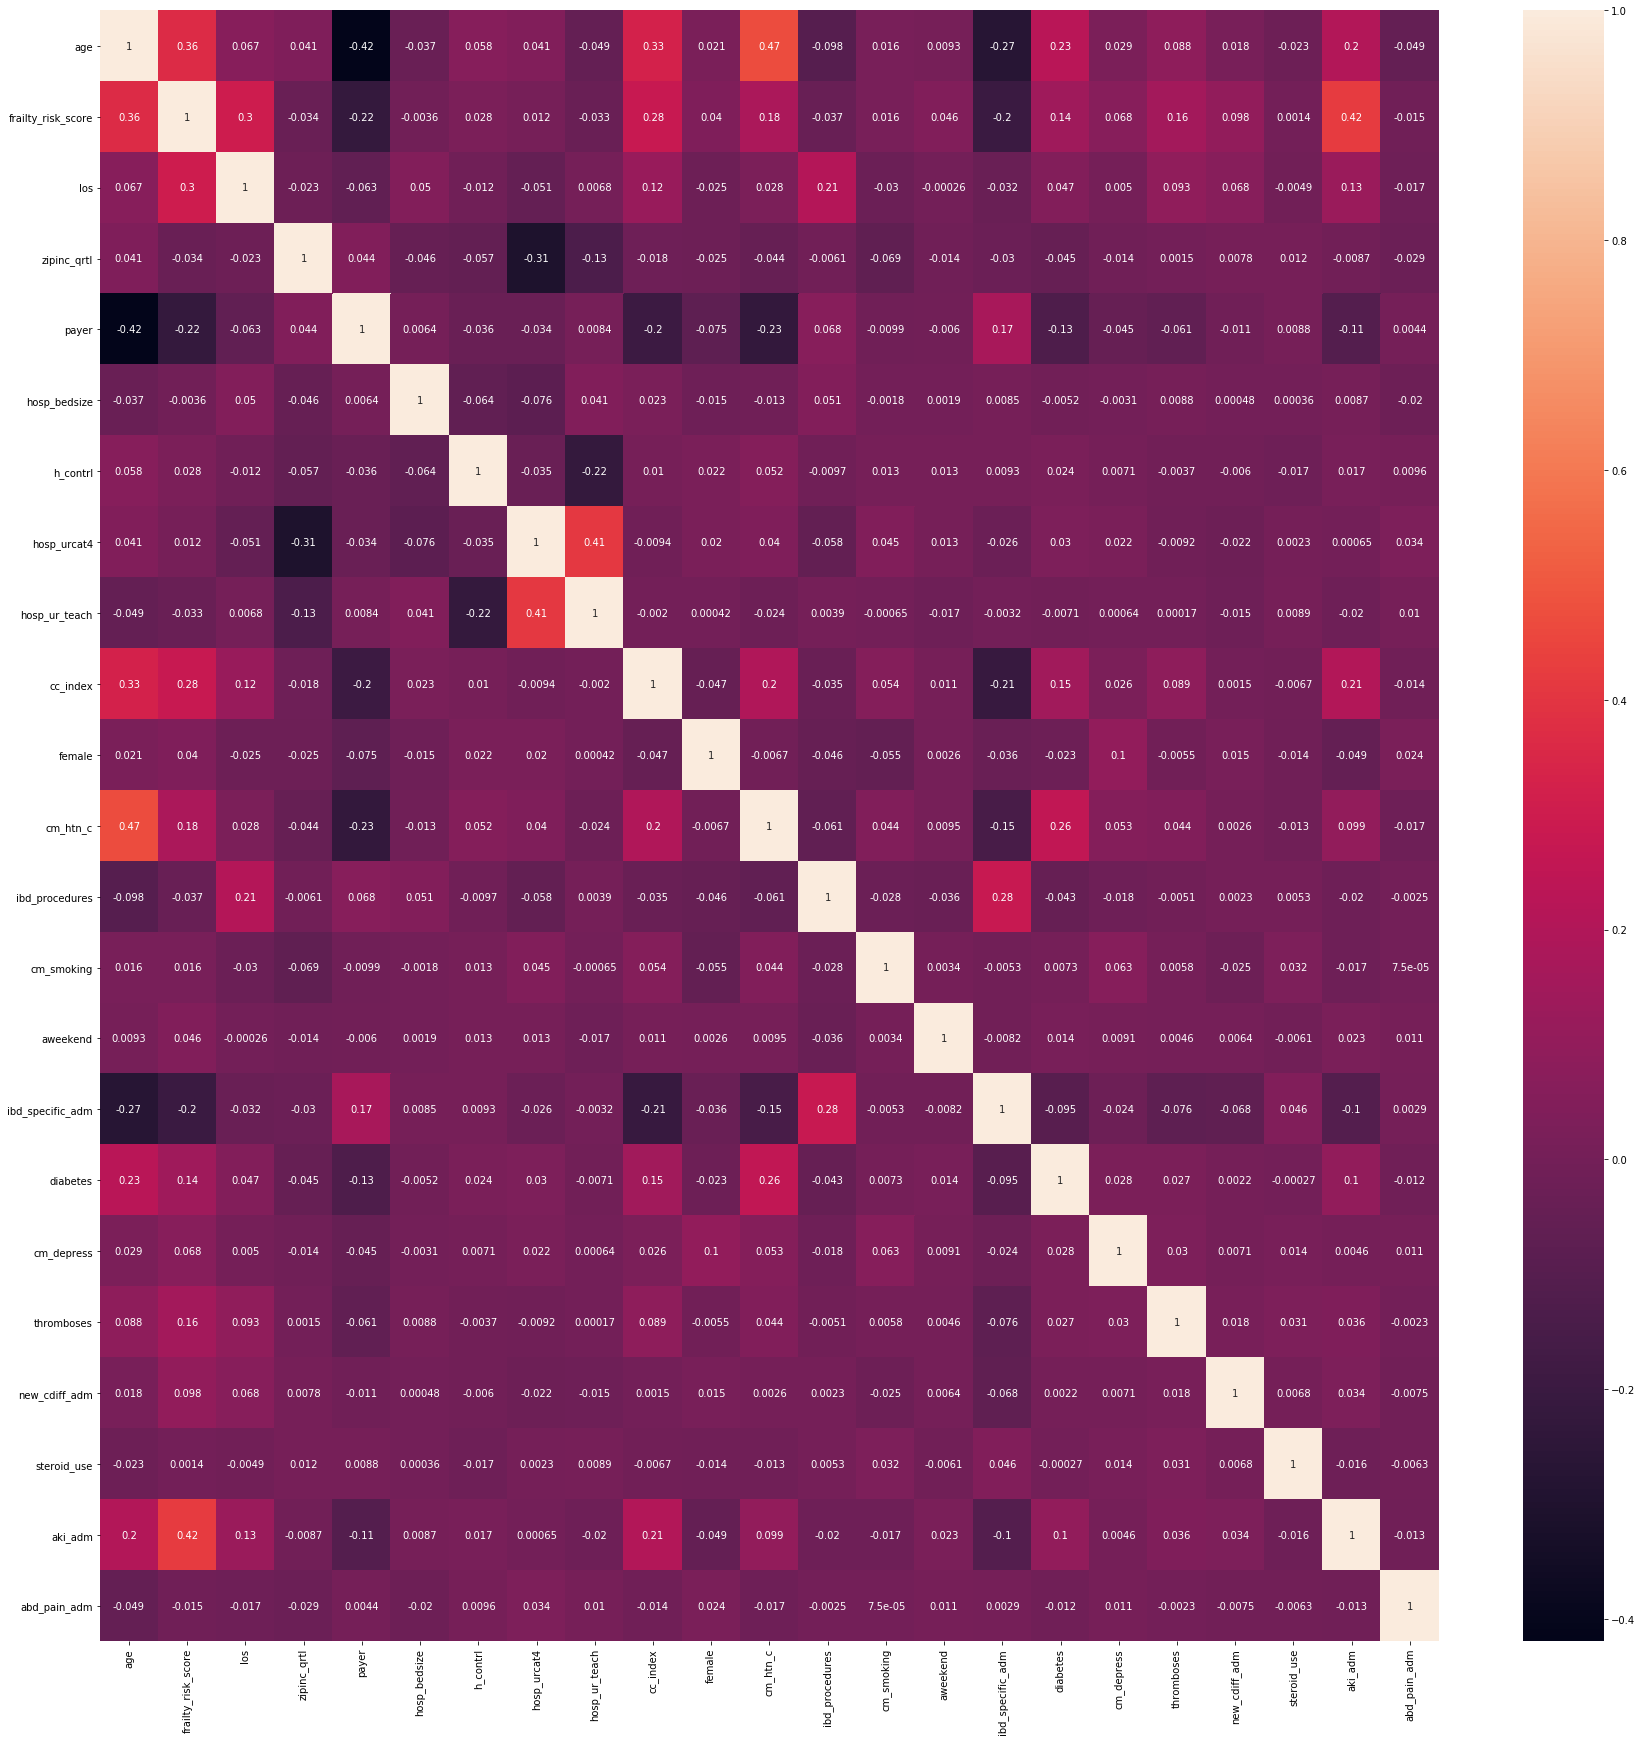

In [51]:
# Correlation matrix
corrMatrix = cleaned_data_wo_outcome.corr()
# Generating a heatmap
import seaborn as sn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))   # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [22]:
# Check for na values
cleaned_data_wo_outcome.isnull().sum()

age                   0
frailty_risk_score    0
los                   0
zipinc_qrtl           0
payer                 0
hosp_bedsize          0
h_contrl              0
hosp_urcat4           0
hosp_ur_teach         0
cc_index              0
female                0
cm_htn_c              0
ibd_procedures        0
cm_smoking            0
aweekend              0
ibd_specific_adm      0
diabetes              0
cm_depress            0
thromboses            0
new_cdiff_adm         0
steroid_use           0
aki_adm               0
abd_pain_adm          0
dtype: int64

In [ ]:
# Show rows where the null values are 
# Data check
# check_data = readm_data_df[['nrd_visitlink', 'ibd_index_hosp', 'ibd_readm', 'age', 'zipinc_qrtl', 'female', 'los', 'pay1', 'new_cc_index', 'frailty_risk_score']]
# check_data[check_data.isna().any(axis=1)]

In [ ]:
# # Change one of the variables

# from sklearn.preprocessing import LabelEncoder

# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y = label_encoder.transform(y)

### Using traditional train-test split

In [ ]:
# # Set up training and testing datasets

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(cleaned_data_wo_outcome, target, random_state=42)

In [ ]:
# Build the random forrest classifier

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

### Using k-fold cross-validation

In [23]:
# Hypertuning parameers with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data_wo_outcome, target, random_state=42)

rf = RandomForestClassifier(n_estimators=200)

rf.fit(X_train, y_train)

print(f'Training Score: {rf.score(X_train, y_train)}')
print(f'Testing Score: {rf.score(X_test, y_test)}')

# Hypertuning parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15]}

grid = GridSearchCV(rf,param_grid, verbose=3)

Training Score: 0.9996282953050838
Testing Score: 0.9194544518785384


In [24]:
# Printing out the grid for hypertuning
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ max_depth=5, n_estimators=50, score=0.887, total=   0.4s
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ........ max_depth=5, n_estimators=50, score=0.895, total=   0.4s
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ........ max_depth=5, n_estimators=50, score=0.909, total=   0.4s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.885, total=   0.4s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.904, total=   0.4s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.891, total=   0.7s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.892, total=   0.7s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.899, total=   0.8s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] ....... max_depth=5, n_estimators=100, score=0.903, total=   0.7s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              ra

In [25]:
# Print the best depth and estimator
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 10, 'n_estimators': 100}
0.9257162690045977


In [26]:
# Check the training and testing scores
print(f'Training Score: {grid.score(X_train, y_train)}')
grid.predict(X_test)
print(f'Testing Score: {grid.score(X_test, y_test)}')

Training Score: 0.9397552467547321
Testing Score: 0.9227140161262652


In [32]:
# Creating ROC/AUC chart
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logistic_roc_auc = roc_auc_score(y_test.values, grid.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test.values, grid.predict_proba(X_test)[:,1])

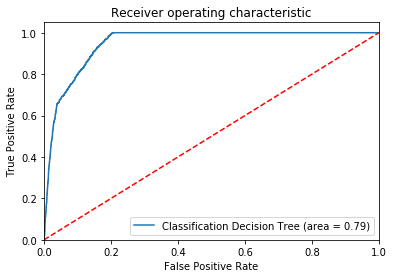

In [33]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='Classification Decision Tree (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Classification_Logisitic_Regression_ROC')
plt.show()

In [27]:
# Check the feature importance
sorted(zip(rf.feature_importances_, X_train), reverse=True)

[(0.43542366345061145, 'los'),
 (0.12283720617255703, 'age'),
 (0.10014787398881787, 'frailty_risk_score'),
 (0.0427528701122791, 'zipinc_qrtl'),
 (0.02836662596256413, 'cc_index'),
 (0.02819411408630369, 'hosp_bedsize'),
 (0.02595144963765497, 'h_contrl'),
 (0.02578098906580961, 'hosp_urcat4'),
 (0.023689040554413794, 'hosp_ur_teach'),
 (0.023333195824558357, 'payer'),
 (0.0198394017599039, 'female'),
 (0.017191002512503273, 'cm_smoking'),
 (0.016466706859795878, 'aweekend'),
 (0.01593875208314121, 'cm_htn_c'),
 (0.014038618104070944, 'ibd_procedures'),
 (0.012915903375859789, 'ibd_specific_adm'),
 (0.01227487259027952, 'diabetes'),
 (0.011056548568351116, 'cm_depress'),
 (0.006377696646411993, 'thromboses'),
 (0.00602713991379677, 'steroid_use'),
 (0.005617141682826686, 'aki_adm'),
 (0.0031147726619848996, 'abd_pain_adm'),
 (0.002664414385504154, 'new_cdiff_adm')]

In [40]:
# Set up training and testing datasets for ROC curves
clf = tree.DecisionTreeClassifier(splitter = "best", max_depth = 5)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data_wo_outcome, target, random_state=42)

clf.fit(X_train, y_train)

#Making the ROC curves
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

randomforrest_roc_auc = roc_auc_score(y_test.values, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test.values, clf.predict_proba(X_test)[:,1])

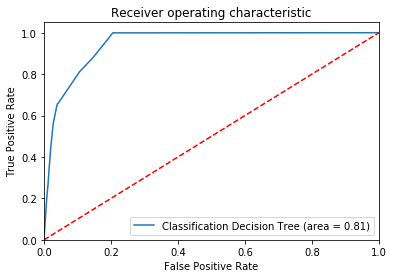

In [41]:
# Plotting the ROC curves

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='Classification Decision Tree (area = %0.2f)' % randomforrest_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Classification_Random_Forest_ROC')
plt.show()

In [46]:
# K-fold validation

# Build the decision tree first

# clf = tree.DecisionTreeClassifier(splitter = "best", max_features = "auto", max_depth = 6)
# clf = tree.DecisionTreeClassifier(splitter = "best", criterion = "entropy", max_depth = 6)
clf = tree.DecisionTreeClassifier(splitter = "best", max_depth = 5)

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

scores = cross_validate(clf, cleaned_data_wo_outcome, target, cv=10,
                        scoring=('roc_auc', 'precision','recall', 'accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.04884791, 0.03690219, 0.03834867, 0.03789878, 0.03789997,
       0.03889585, 0.03690219, 0.03892326, 0.03789926, 0.03692865]), 'score_time': array([0.00698161, 0.00598478, 0.00596786, 0.00598454, 0.00598335,
       0.00498652, 0.00598383, 0.00595737, 0.00598454, 0.00595689]), 'test_roc_auc': array([0.94444489, 0.94809336, 0.94437151, 0.94875353, 0.94912198,
       0.94682334, 0.95315106, 0.94728986, 0.94726332, 0.9513634 ]), 'train_roc_auc': array([0.95193812, 0.95123719, 0.95229228, 0.95061394, 0.95048044,
       0.95112741, 0.95131081, 0.95089802, 0.95133235, 0.95127233]), 'test_precision': array([0.68986083, 0.69047619, 0.66415094, 0.71487603, 0.66666667,
       0.67293233, 0.71062992, 0.67587477, 0.66347992, 0.70498084]), 'train_precision': array([0.6886049 , 0.68732812, 0.69413287, 0.68885549, 0.69545256,
       0.69087404, 0.68888889, 0.68996569, 0.69325021, 0.68498091]), 'test_recall': array([0.64259259, 0.64444444, 0.65306122, 0.6419295 , 0.6567718 ,
     

In [ ]:
# # Fit the model on the test dataset and evaluate the output

# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=200)
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)

In [ ]:
# # Evaluate the features of the model

# sorted(zip(rf.feature_importances_, featured_names), reverse=True)

### Using Gradient Boosted Decision Tree

In [ ]:
# XGBClassifier
from sklearn import  metrics, model_selection
from xgboost.sklearn import XGBClassifier
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.2,
    'silent': 1.0,
    'n_estimators': 125,
    'min_child_weight': 0.68,
    'gamma': 2.5
}
model = XGBClassifier(**params).fit(X_train, y_train)

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(model, data, target, cv=10, scoring='accuracy')
print(scores)
print(f"Average score: {scores.mean()}, Stdev: {scores.std()}")

In [ ]:
# Set up training and testing datasets for ROC curves

#Making the ROC curves

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data_wo_outcome, target, random_state=42)

model.fit(X_train, y_train)

boosted_roc_auc = roc_auc_score(y_test.values, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test.values, model.predict_proba(X_test)[:,1])

In [ ]:

# use the model to make predictions with the test data
y_pred = model.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

### Using logistic regression

In [48]:
# Using logistic regression and k-fold validation
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

scores = cross_validate(classifier, cleaned_data_wo_outcome, target, cv=10,
                        scoring=('roc_auc', 'precision','recall', 'accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.29066968, 0.3251524 , 0.30019736, 0.29022408, 0.29025102,
       0.28922749, 0.28077054, 0.27827644, 0.29074788, 0.29471874]), 'score_time': array([0.00698113, 0.00598383, 0.00598407, 0.00797844, 0.0079782 ,
       0.00797749, 0.0069809 , 0.00698161, 0.0069809 , 0.00698042]), 'test_roc_auc': array([0.94704844, 0.95248545, 0.94774716, 0.94851622, 0.94975473,
       0.94554074, 0.95593782, 0.94959052, 0.94616045, 0.9550278 ]), 'train_roc_auc': array([0.95092577, 0.95076048, 0.95100019, 0.95094008, 0.95089764,
       0.95074819, 0.94990721, 0.95031285, 0.95057431, 0.94999699]), 'test_precision': array([0.69306931, 0.69371197, 0.6635514 , 0.71836735, 0.66604824,
       0.67552182, 0.71709234, 0.67777778, 0.66412214, 0.70576923]), 'train_precision': array([0.68558673, 0.68595218, 0.69040918, 0.68356048, 0.68803419,
       0.68918627, 0.68494926, 0.68682969, 0.69028645, 0.68443588]), 'test_recall': array([0.64814815, 0.63333333, 0.65862709, 0.65306122, 0.66604824,
     

In [49]:
#Making the ROC curves
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Set up training and testing datasets for ROC curves

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data_wo_outcome, target, random_state=42)

classifier.fit(X_train, y_train)

logistic_roc_auc = roc_auc_score(y_test.values, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test.values, classifier.predict_proba(X_test)[:,1])

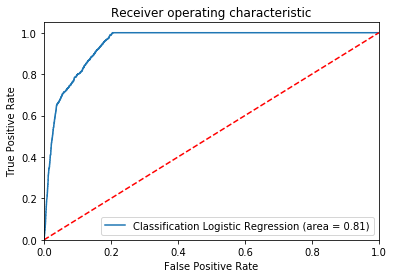

In [50]:
# Plotting the ROC curves

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='Classification Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Classification_Logistic_Regression_ROC')
plt.show()

### Using support vector machine 

In [ ]:
# Support vector machine linear classifier
from sklearn.svm import SVC 

model = SVC(kernel='linear')
model.fit(cleaned_data_wo_outcome, target)

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

scores = cross_validate(model, cleaned_data_wo_outcome, target, cv=10,
                        scoring=('roc_auc', 'precision','recall', 'accuracy'),
                        return_train_score=True)

print(scores)

In [ ]:
# Set up training and testing datasets for ROC curves
from sklearn.svm import SVC 

model = SVC(kernel='linear')
model.fit(cleaned_data_wo_outcome, target)

#Making the ROC curves
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Set up training and testing datasets for ROC curves

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data_wo_outcome, target, random_state=42)

model.fit(X_train, y_train)

In [ ]:
svm_roc_auc = roc_auc_score(y_test.values, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test.values, model.predict_proba(X_test)[:,1])

In [ ]:
# Plotting the ROC curves

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

In [ ]:
# # Model Accuracy
# print('Test Acc: %.3f' % model.score(X_test, y_test))

In [ ]:
# # Calculate classification report
# from sklearn.metrics import classification_report
# predictions = model.predict(X_test)
# print(classification_report(y_test, predictions,
#                             target_names=target_names))

In [ ]:
# from sklearn import tree
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                   feature_names=new_feature_names,  
#                       class_names=target_names,  
#                       filled=True, rounded=True)  
# #                      special_characters=False)

# graph = graphviz.Source(dot_data)  
# graph 